In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

601

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao joao da barra
Processing Record 2 of Set 1 | vondrozo
Processing Record 3 of Set 1 | lakes entrance
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | itarema
Processing Record 7 of Set 1 | coihaique
Processing Record 8 of Set 1 | yar-sale
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 11 of Set 1 | pierre
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | ust-shonosha
Processing Record 14 of Set 1 | nanortalik
Processing Record 15 of Set 1 | maksatikha
Processing Record 16 of Set 1 | ponta do sol
Processing Record 17 of Set 1 | upernavik
Processing Record 18 of Set 1 | alyangula
Processing Record 19 of Set 1 | gat
Processing Record 20 of Set 1 | axim
Processing Record 21 of Set 1 | sitka
Processing Record 22 of Set 1 | kapaa

Processing Record 39 of Set 4 | nemuro
Processing Record 40 of Set 4 | huron
Processing Record 41 of Set 4 | hami
Processing Record 42 of Set 4 | daru
Processing Record 43 of Set 4 | logan lake
Processing Record 44 of Set 4 | pemberton
Processing Record 45 of Set 4 | nanga eboko
Processing Record 46 of Set 4 | kushmurun
Processing Record 47 of Set 4 | hermon
Processing Record 48 of Set 4 | kungurtug
Processing Record 49 of Set 4 | saurimo
Processing Record 50 of Set 4 | khovu-aksy
Processing Record 1 of Set 5 | lufilufi
Processing Record 2 of Set 5 | the valley
Processing Record 3 of Set 5 | yumen
Processing Record 4 of Set 5 | pacasmayo
Processing Record 5 of Set 5 | gorom-gorom
Processing Record 6 of Set 5 | yellowknife
Processing Record 7 of Set 5 | esperance
Processing Record 8 of Set 5 | waddan
Processing Record 9 of Set 5 | channel-port aux basques
Processing Record 10 of Set 5 | solnechnyy
Processing Record 11 of Set 5 | port augusta
Processing Record 12 of Set 5 | laguna
Proces

Processing Record 27 of Set 8 | port-gentil
Processing Record 28 of Set 8 | miracema do tocantins
Processing Record 29 of Set 8 | mbaiki
Processing Record 30 of Set 8 | aykhal
Processing Record 31 of Set 8 | jibuti
Processing Record 32 of Set 8 | nizwa
Processing Record 33 of Set 8 | nikolskoye
Processing Record 34 of Set 8 | lazaro cardenas
Processing Record 35 of Set 8 | manokwari
Processing Record 36 of Set 8 | masuguru
Processing Record 37 of Set 8 | phek
Processing Record 38 of Set 8 | marrakesh
Processing Record 39 of Set 8 | jatiroto
Processing Record 40 of Set 8 | port macquarie
Processing Record 41 of Set 8 | clyde river
Processing Record 42 of Set 8 | agua verde
Processing Record 43 of Set 8 | karakol
Processing Record 44 of Set 8 | mentok
City not found. Skipping...
Processing Record 45 of Set 8 | aracaju
Processing Record 46 of Set 8 | srednekolymsk
Processing Record 47 of Set 8 | upington
Processing Record 48 of Set 8 | lushunkou
City not found. Skipping...
Processing Reco

City not found. Skipping...
Processing Record 16 of Set 12 | port hawkesbury
Processing Record 17 of Set 12 | andros town
Processing Record 18 of Set 12 | abeche
Processing Record 19 of Set 12 | pathein
Processing Record 20 of Set 12 | karlstad
Processing Record 21 of Set 12 | chimbarongo
Processing Record 22 of Set 12 | san patricio
Processing Record 23 of Set 12 | sarakhs
Processing Record 24 of Set 12 | huarmey
Processing Record 25 of Set 12 | ulaangom
Processing Record 26 of Set 12 | chernigovka
Processing Record 27 of Set 12 | clonakilty
Processing Record 28 of Set 12 | lubango
Processing Record 29 of Set 12 | plettenberg bay
Processing Record 30 of Set 12 | inirida
Processing Record 31 of Set 12 | flinders
Processing Record 32 of Set 12 | mangochi
Processing Record 33 of Set 12 | kirkwood
Processing Record 34 of Set 12 | nyandoma
Processing Record 35 of Set 12 | horasan
Processing Record 36 of Set 12 | aklavik
Processing Record 37 of Set 12 | kajaani
Processing Record 38 of Set 1

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sao Joao Da Barra,-21.64,-41.05,72.05,86,100,3.24,BR,2020-11-24 02:15:39
1,Vondrozo,-22.82,47.28,64.02,100,67,2.30,MG,2020-11-24 02:15:40
2,Lakes Entrance,-37.88,147.98,70.00,52,4,1.99,AU,2020-11-24 02:15:40
3,Butaritari,3.07,172.79,82.18,76,47,11.65,KI,2020-11-24 02:12:17
4,Ushuaia,-54.80,-68.30,42.80,56,20,25.28,AR,2020-11-24 02:11:33
5,Itarema,-2.92,-39.92,78.24,83,29,10.33,BR,2020-11-24 02:15:41
6,Coihaique,-45.58,-72.07,42.80,87,90,4.70,CL,2020-11-24 02:15:41
7,Yar-Sale,66.83,70.83,13.66,96,98,12.91,RU,2020-11-24 02:15:41
8,Busselton,-33.65,115.33,81.00,46,0,3.00,AU,2020-11-24 02:11:54
9,Pierre,44.37,-100.35,39.20,80,1,20.80,US,2020-11-24 02:15:42


In [15]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Joao Da Barra,BR,2020-11-24 02:15:39,-21.64,-41.05,72.05,86,100,3.24
1,Vondrozo,MG,2020-11-24 02:15:40,-22.82,47.28,64.02,100,67,2.30
2,Lakes Entrance,AU,2020-11-24 02:15:40,-37.88,147.98,70.00,52,4,1.99
3,Butaritari,KI,2020-11-24 02:12:17,3.07,172.79,82.18,76,47,11.65
4,Ushuaia,AR,2020-11-24 02:11:33,-54.80,-68.30,42.80,56,20,25.28
5,Itarema,BR,2020-11-24 02:15:41,-2.92,-39.92,78.24,83,29,10.33
6,Coihaique,CL,2020-11-24 02:15:41,-45.58,-72.07,42.80,87,90,4.70
7,Yar-Sale,RU,2020-11-24 02:15:41,66.83,70.83,13.66,96,98,12.91
8,Busselton,AU,2020-11-24 02:11:54,-33.65,115.33,81.00,46,0,3.00
9,Pierre,US,2020-11-24 02:15:42,44.37,-100.35,39.20,80,1,20.80


In [16]:
# Create the output file (CSV).
output_data_file = "cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

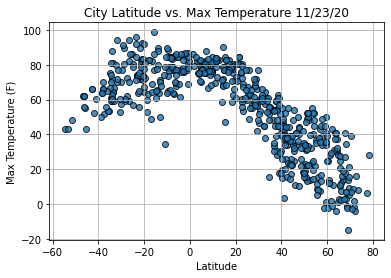

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

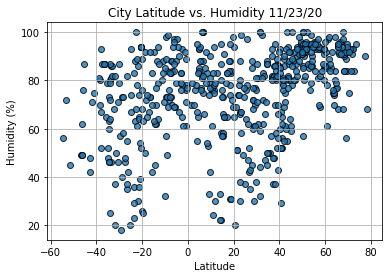

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.

plt.show()

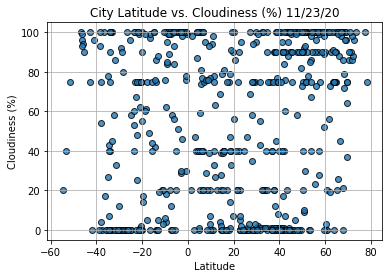

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

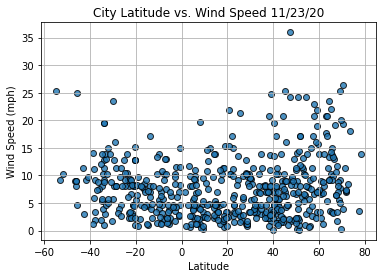

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [39]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

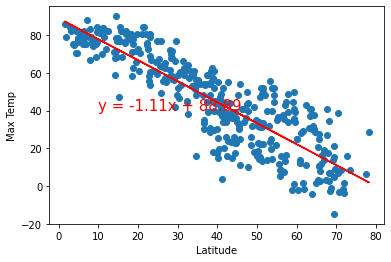

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

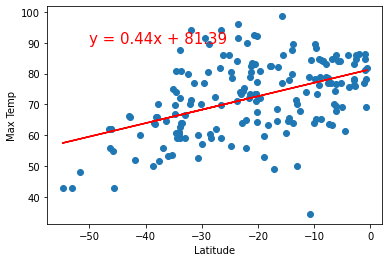

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

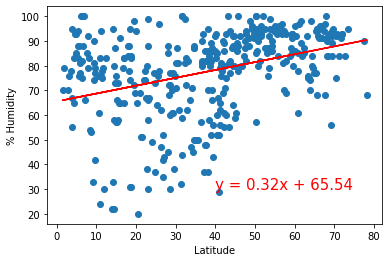

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,30))

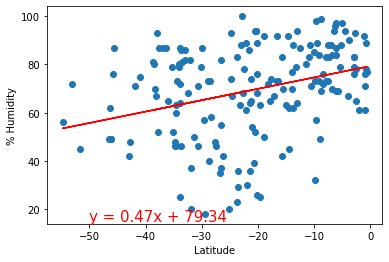

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

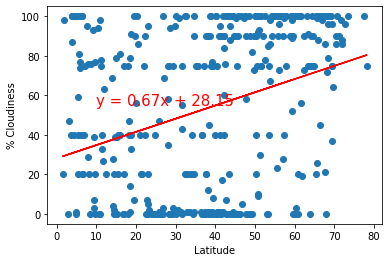

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

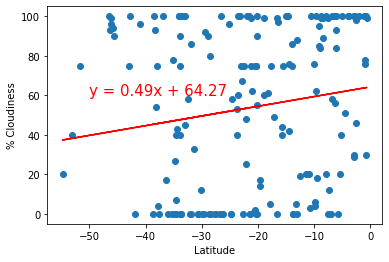

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

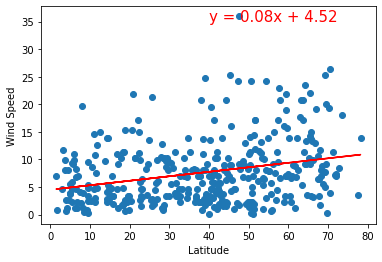

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for Wind Speed', 'Wind Speed',(40,35))

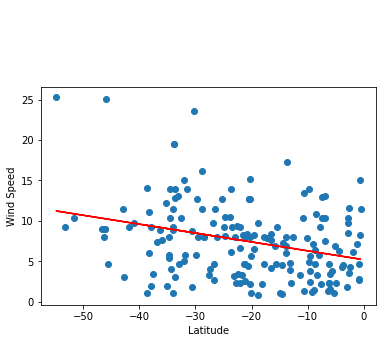

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))